## Assignment 2 (part II)
In this assignment, you are going to develop a neural machine translation system from scratch. The system will translate sentences from English to Chinese (simplified) with state-of-the-art deep learning techniques. Validation data, including 900 English and Chinese sentence pairs named **val.{en,zh}**, are provided for you to test your model's performance. By the due time, we will release a test data **test.en**, which is comprised of 900 English sentences, for you to translate. You are required to translate those sentences into target language, i.e., simplified Chinese with your system within **ONE** hour. The final result will be scored by [BLEU](https://en.wikipedia.org/wiki/BLEU).

Here are some advice to follow:
- The trainining sentences can be found in [WMT conference](http://statmt.org/wmt21/translation-task.html), where you can choose **Common Crawl corpus** or **UN Parallel Corpus V1.0**, or both as your training dataset. You are also encouraged to take advantage of as many data as possible to enhance your sysytem.
- You are free to choose any neural architecture to build your translation system, e.g., LSTM, CNN, transformer, etc.
- It is recommended to use GPU to accelarate the model training.
- Consider to use fewer data and less complex model in case you are running out of time.

### What you need to submit:
1. A file containing translated sentences of the source sentences from the source file **test.en**, which will be released later. Please save the sentences line-by-line to the file named **translate.zh**.
2. Two files containing training loss values and validation loss values. The loss is defined as [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy). We also provide two files, named **train_loss.csv** and **val_loss.csv**, which contain two sample sets, for your reference. Note, for either training or validation, at least 10 loss values are required to submit.
3. This notebook.
4. Zip all the files and name it with your student ID, e.g., 1234.zip.

### When to sumit:
- The test date will be released at **7pm, May 3, 2021 (Monday)**. The submission deadline is **8pm, May 3, 2021 (Monday)**. Make sure your system can translate a file which contains 900 English sentences into Chinese sentences in **ONE** hour. You can test this by tranlating the provided validation file **val.en**.

**IMPORTANT**
- **DO NOT** cheat by either using existing machine translation system, e.g., Google, Microsoft, Baidu, etc, or copying results from your classmates. Once confirmed, your score will be zero. The purpose of this assignment is to encourage you to apply deep learning to a real-world application. Please be reminded that the process is more important than the result.
- Please run the remaining cells of this notebook before submission.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### The plot
The curves of the tranining/validation losses may look like

In [5]:
# You can save the loss values (a list) using pandas, e.g.
# df = pd.DataFrame(data=train_losses, columns=["train_loss"])
# df.to_csv("train_loss.csv")
train_losses = pd.read_csv("train_loss.csv", index_col=0)
val_losses = pd.read_csv("val_loss.csv", index_col=0)

<AxesSubplot:>

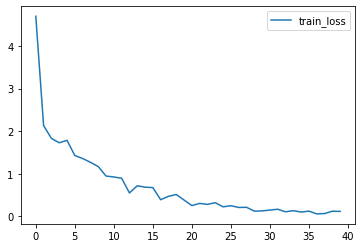

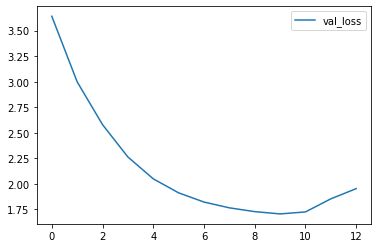

In [6]:
train_losses.plot()
val_losses.plot()

### Validate your submission

In [7]:
import os
def check_file(file):
    if not os.path.isfile(file):
        raise FileNotFoundError(f"{file} not found")

In [8]:
check_file("translate.zh")
check_file("train_loss.csv")
check_file("val_loss.csv")

In [9]:
# Make sure the translated file has the same number of lines as the source file
def cnt_file_lines(file):
    cnt = 0
    with open(file) as fin:
        for line in fin:
            if line:
                cnt += 1
    return cnt
source_line_num = cnt_file_lines("test.en")
target_line_num = cnt_file_lines("translate.zh")
assert source_line_num == target_line_num